---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [1]:
import pandas as pd
import numpy as np

energy = pd.read_excel('Energy Indicators.xls', header = 0, skiprows= 17, skip_footer= 38, 
                           names=['col0', 'col1', 'Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'] )
energy.drop(energy.columns[[0,1]], axis=1, inplace=True)
energy = energy.replace(to_replace="...", value=np.NaN)
energy['Energy Supply'] = energy['Energy Supply'].astype(float)
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321.0,10.0,78.669280
1,Albania,102.0,35.0,100.000000
2,Algeria,1959.0,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.0,121.0,88.695650


In [2]:
energy['Energy Supply'] = energy['Energy Supply'] * 1000000
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


In [3]:
energy['Country'] = energy['Country'].str.replace(r"[0-9]","")

In [4]:
energy['Country'] = energy['Country'].replace(to_replace="Republic of Korea", value ="South Korea")
energy['Country'] = energy['Country'].replace(to_replace="United States of America", value ="United States")
energy['Country'] = energy['Country'].replace(to_replace="United Kingdom of Great Britain and Northern Ireland", value ="United Kingdom")
energy['Country'] = energy['Country'].replace(to_replace="China, Hong Kong Special Administrative Region", value ="Hong Kong")

In [5]:
energy['Country'] = energy['Country'].str.replace(r"\(.*\)","")
energy['Country'] = energy['Country'].str.strip()
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


In [6]:
GDP = pd.read_csv('world_bank.csv', skiprows=4)
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [7]:
GDP['Country Name'] = GDP['Country Name'].replace(to_replace= "Korea, Rep.", value= "South Korea") 
GDP['Country Name'] = GDP['Country Name'].replace(to_replace= "Iran, Islamic Rep.", value= "Iran") 
GDP['Country Name'] = GDP['Country Name'].replace(to_replace= "Hong Kong SAR, China", value = "Hong Kong")
GDP['Country Name'] = GDP['Country Name'].str.replace(r"\(.*\)","")
GDP['Country Name'] = GDP['Country Name'].str.replace(r"[0-9]","")

In [8]:
GDP['Country Name'] = GDP['Country Name'].str.strip()

In [9]:
GDP1 = GDP[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015']]
GDP1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [10]:
GDP1 = GDP1.rename(columns={'Country Name' : 'Country'})
GDP1.head()

,Country,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [11]:
ScimEn = pd.read_excel('scimagojr-3.xlsx' )
ScimEn.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


In [12]:
ScimEn['Country'] = ScimEn['Country'].str.strip()

In [13]:
merge_df = pd.merge(pd.merge(energy, GDP1, how='inner', left_on='Country', right_on='Country'), ScimEn, how='inner',  left_on='Country', right_on='Country')
merge_df.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable,Country Code,Indicator Name,Indicator Code,2006,2007,2008,...,2013,2014,2015,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,Afghanistan,3.210000e+08,10.0,78.669280,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.030523e+10,1.172119e+10,1.214448e+10,...,1.973134e+10,1.999032e+10,2.029415e+10,163,3,3,0,0,0.00,0
1,Albania,1.020000e+08,35.0,100.000000,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,9.771760e+09,1.034829e+10,1.112752e+10,...,1.254247e+10,1.279331e+10,1.312082e+10,118,23,23,168,14,7.30,6
2,Algeria,1.959000e+09,51.0,0.551010,DZA,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.446474e+11,1.495654e+11,1.531550e+11,...,1.763249e+11,1.830252e+11,1.901632e+11,42,1215,1197,7393,1413,6.08,40
3,American Samoa,NaN,NaN,0.641026,ASM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,...,NaN,NaN,NaN,180,1,1,0,0,0.00,0
4,Andorra,9.000000e+06,121.0,88.695650,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4.018196e+09,4.021331e+09,3.675728e+09,...,3.127550e+09,NaN,NaN,168,2,2,13,0,6.50,1


In [14]:
merge_df1 = merge_df.sort_values(['Rank', 'Country'], ascending=[True, True])

In [15]:
merge_df1= merge_df1.head(15)
merge_df1

,Country,Energy Supply,Energy Supply per Capita,% Renewable,Country Code,Indicator Name,Indicator Code,2006,2007,2008,...,2013,2014,2015,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
35,China,1.271910e+11,93.0,19.754910,CHN,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,3.992331e+12,4.559041e+12,4.997775e+12,...,7.672448e+12,8.230121e+12,8.797999e+12,1,127050,126767,597237,411683,4.70,138
157,United States,9.083800e+10,286.0,11.570980,USA,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.479230e+13,1.505540e+13,1.501149e+13,...,1.577367e+13,1.615662e+13,1.654857e+13,2,96661,94747,792274,265436,8.20,230
76,Japan,1.898400e+10,149.0,10.232820,JPN,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,5.496542e+12,5.617036e+12,5.558527e+12,...,5.644659e+12,5.642884e+12,5.669563e+12,3,30504,30287,223024,61554,7.31,134
156,United Kingdom,7.920000e+09,124.0,10.600470,GBR,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,2.419631e+12,2.482203e+12,2.470614e+12,...,2.533370e+12,2.605643e+12,2.666333e+12,4,20944,20357,206091,37874,9.84,139
127,Russian Federation,3.070900e+10,214.0,17.288680,RUS,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.385793e+12,1.504071e+12,1.583004e+12,...,1.666934e+12,1.678709e+12,1.616149e+12,5,18534,18301,34266,12422,1.85,57
31,Canada,1.043100e+10,296.0,61.945430,CAN,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.564469e+12,1.596740e+12,1.612713e+12,...,1.730688e+12,1.773486e+12,1.792609e+12,6,17899,17620,215003,40930,12.01,149
57,Germany,1.326100e+10,165.0,17.901530,DEU,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,3.332891e+12,3.441561e+12,3.478809e+12,...,3.567317e+12,3.624386e+12,3.685556e+12,7,17027,16831,140566,27426,8.26,126
68,India,3.319500e+10,26.0,14.969080,IND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.265894e+12,1.374865e+12,1.428361e+12,...,2.051982e+12,2.200617e+12,2.367206e+12,8,15005,14841,128763,37209,8.58,115
54,France,1.059700e+10,166.0,17.020280,FRA,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,2.607840e+12,2.669424e+12,2.674637e+12,...,2.722567e+12,2.729632e+12,2.761185e+12,9,13153,12973,130632,28601,9.93,114
125,South Korea,1.100700e+10,221.0,2.279353,KOR,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,9.410199e+11,9.924316e+11,1.020510e+12,...,1.194429e+12,1.234340e+12,1.266580e+12,10,11983,11923,114675,22595,9.57,104


In [16]:
col = ['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
merge_df1 = merge_df1[col]
merge_df1

,Country,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
35,China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,...,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
157,United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,...,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
76,Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,...,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
156,United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,...,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
127,Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,...,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
31,Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,...,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
57,Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,...,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
68,India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,...,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
54,France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,...,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
125,South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,...,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


In [17]:
merge_df2 = merge_df1.set_index('Country')
merge_df2

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [18]:
#print(merge_df2.columns)

In [19]:
def answer_one():
    return merge_df2
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [20]:
#print(merge_df2.columns)

In [21]:
#print(merge_df2.index)

In [22]:
merge_df2.shape

(15, 20)

In [23]:
#print(merge_df2.info)
#print(merge_df2.columns)
#print(merge_df2.index)

### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [24]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [25]:
import pandas as pd
import numpy as np

energy = pd.read_excel('Energy Indicators.xls', header = 0, skiprows= 17, skip_footer= 38, 
                           names=['col0', 'col1', 'Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'] )
energy.drop(energy.columns[[0,1]], axis=1, inplace=True)
energy = energy.replace(to_replace="...", value=np.NaN)
energy['Energy Supply'] = energy['Energy Supply'].astype(float)

energy['Energy Supply'] = energy['Energy Supply'] * 1000000
#energy['Country'] = energy['Country'].str.replace(r"[0-9]","")

#energy['Country'] = energy['Country'].replace(to_replace="Republic of Korea", value ="South Korea")
#energy['Country'] = energy['Country'].replace(to_replace="United States of America", value ="United States")
#energy['Country'] = energy['Country'].replace(to_replace="United Kingdom of Great Britain and Northern Ireland", value ="United Kingdom")
#energy['Country'] = energy['Country'].replace(to_replace="China, Hong Kong Special Administrative Region", value ="Hong Kong")
#energy = energy.replace('Bolivia (Plurinational State of)', 'Bolivia')
#energy = energy.replace('Iran (Islamic Republic of)', 'Iran')

energy['Country'] = energy['Country'].str.replace(r"\d+$","")
# Change specific countries designation:
energy = energy.replace('Republic of Korea', 'South Korea')
energy = energy.replace('United States of America', 'United States')
energy = energy.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
energy = energy.replace('China, Hong Kong Special Administrative Region', 'Hong Kong')
energy = energy.replace('Bolivia (Plurinational State of)', 'Bolivia')
energy = energy.replace('Iran (Islamic Republic of)', 'Iran')

GDP = pd.read_csv('world_bank.csv', skiprows=4)

#GDP['Country Name'] = GDP['Country Name'].replace(to_replace= "Korea, Rep.", value= "South Korea") 
#GDP['Country Name'] = GDP['Country Name'].replace(to_replace= "Iran, Islamic Rep.", value= "Iran") 
#GDP['Country Name'] = GDP['Country Name'].replace(to_replace= "Hong Kong SAR, China", value = "Hong Kong")
#GDP['Country Name'] = GDP['Country Name'].str.replace(r"\(.*\)","")
#GDP['Country Name'] = GDP['Country Name'].str.replace(r"[0-9]","")

GDP = GDP.replace('Korea, Rep.', 'South Korea') 
GDP = GDP.replace('Iran, Islamic Rep.', 'Iran') 
GDP = GDP.replace('Hong Kong SAR, China', 'Hong Kong')
#GDP['Country Name'] = GDP['Country Name'].str.replace(r"\(.*\)","")
#GDP['Country Name'] = GDP['Country Name'].str.replace(r"[0-9]","")


GDP['Country Name'] = GDP['Country Name'].str.replace(r"\d+$","")

#GDP['Country Name'] = GDP['Country Name'].str.strip()
#GDP1 = GDP[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015']]
GDP1 = GDP.rename(columns={'Country Name' : 'Country'})

ScimEn = pd.read_excel('scimagojr-3.xlsx' )
ScimEn['Country'] = ScimEn['Country'].str.strip()

#inner_df = pd.merge(pd.merge(ScimEn, energy, how='inner', left_on='Country', right_on='Country'), GDP1, how='inner',  left_on='Country', right_on='Country')
#outer_df = pd.merge(pd.merge(ScimEn, energy, how='outer', left_on='Country', right_on='Country'), GDP1, how='outer',  left_on='Country', right_on='Country')
#len(energy)
#len(energy)
#len(GDP1)
#len(ScimEn) 
#l1 = len(inner_df) 
#l2 = len(outer_df)
#l3 = l2 - l1
#l3
#pd.merge(df_left,df_right,on='commonkey')

df_inner = pd.merge(ScimEn, energy, how = 'inner', on='Country')
df_inner = pd.merge(df_inner, GDP1, how = 'inner',  on='Country')
df_outer = pd.merge(ScimEn, energy, how = 'outer',  on='Country')
df_outer = pd.merge(df_outer, GDP1, how = 'outer',  on='Country')
l1 = len(df_outer)-len(df_inner)
l1

156

In [26]:
def answer_two():
    return l1
answer_two()

156

### Question 3 (6.6%)
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [27]:
import pandas as pd
import numpy as np

energy = pd.read_excel('Energy Indicators.xls', header = 0, skiprows= 17, skip_footer= 38, 
                           names=['col0', 'col1', 'Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'] )
energy.drop(energy.columns[[0,1]], axis=1, inplace=True)
energy = energy.replace(to_replace="...", value=np.NaN)
energy['Energy Supply'] = energy['Energy Supply'].astype(float)

energy['Energy Supply'] = energy['Energy Supply'] * 1000000
#energy['Country'] = energy['Country'].str.replace(r"[0-9]","")

#energy['Country'] = energy['Country'].replace(to_replace="Republic of Korea", value ="South Korea")
#energy['Country'] = energy['Country'].replace(to_replace="United States of America", value ="United States")
#energy['Country'] = energy['Country'].replace(to_replace="United Kingdom of Great Britain and Northern Ireland", value ="United Kingdom")
#energy['Country'] = energy['Country'].replace(to_replace="China, Hong Kong Special Administrative Region", value ="Hong Kong")
#energy = energy.replace('Bolivia (Plurinational State of)', 'Bolivia')
#energy = energy.replace('Iran (Islamic Republic of)', 'Iran')

energy['Country'] = energy['Country'].str.replace(r"\d+$","")
# Change specific countries designation:
energy = energy.replace('Republic of Korea', 'South Korea')
energy = energy.replace('United States of America', 'United States')
energy = energy.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
energy = energy.replace('China, Hong Kong Special Administrative Region', 'Hong Kong')
energy = energy.replace('Bolivia (Plurinational State of)', 'Bolivia')
energy = energy.replace('Iran (Islamic Republic of)', 'Iran')

GDP = pd.read_csv('world_bank.csv', skiprows=4)

#GDP['Country Name'] = GDP['Country Name'].replace(to_replace= "Korea, Rep.", value= "South Korea") 
#GDP['Country Name'] = GDP['Country Name'].replace(to_replace= "Iran, Islamic Rep.", value= "Iran") 
#GDP['Country Name'] = GDP['Country Name'].replace(to_replace= "Hong Kong SAR, China", value = "Hong Kong")
#GDP['Country Name'] = GDP['Country Name'].str.replace(r"\(.*\)","")
#GDP['Country Name'] = GDP['Country Name'].str.replace(r"[0-9]","")

GDP = GDP.replace('Korea, Rep.', 'South Korea') 
GDP = GDP.replace('Iran, Islamic Rep.', 'Iran') 
GDP = GDP.replace('Hong Kong SAR, China', 'Hong Kong')
#GDP['Country Name'] = GDP['Country Name'].str.replace(r"\(.*\)","")
#GDP['Country Name'] = GDP['Country Name'].str.replace(r"[0-9]","")


GDP['Country Name'] = GDP['Country Name'].str.replace(r"\d+$","")

#GDP['Country Name'] = GDP['Country Name'].str.strip()
#GDP1 = GDP[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015']]
GDP1 = GDP.rename(columns={'Country Name' : 'Country'})

ScimEn = pd.read_excel('scimagojr-3.xlsx' )
ScimEn['Country'] = ScimEn['Country'].str.strip()

#inner_df = pd.merge(pd.merge(ScimEn, energy, how='inner', left_on='Country', right_on='Country'), GDP1, how='inner',  left_on='Country', right_on='Country')
#outer_df = pd.merge(pd.merge(ScimEn, energy, how='outer', left_on='Country', right_on='Country'), GDP1, how='outer',  left_on='Country', right_on='Country')
#len(energy)
#len(energy)
#len(GDP1)
#len(ScimEn) 
#l1 = len(inner_df) 
#l2 = len(outer_df)
#l3 = l2 - l1
#l3
#pd.merge(df_left,df_right,on='commonkey')

df_inner = pd.merge(ScimEn, energy, how = 'inner', on='Country')
df_inner = pd.merge(df_inner, GDP1, how = 'inner',  on='Country')
avgdp_df1 = df_inner.sort_values(['Rank', 'Country'], ascending=[True, True])
avgdp_df1= avgdp_df1.head(15)
col = ['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
avgdp_df1 =avgdp_df1[col]
avgdp_df1['avgGDP'] = avgdp_df1.loc[:, ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis=1)
avgdp_df1['avgGDP'] = avgdp_df1['avgGDP'].astype(float)
avgdp_df2= avgdp_df1.sort_values(['avgGDP'], ascending=[False])
avgdp_df3=avgdp_df2[['avgGDP', 'Country']]

avgdp_df2 =  avgdp_df2.set_index('Country')
avgdp_df2 =avgdp_df2.iloc[:,0]
#avgdp_df2

In [28]:
Top = merge_df1
Top15 = Top
Top15['avgGDP'] = Top15.loc[:, ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis=1)
Top15['avgGDP'] = Top15['avgGDP'].astype(float)
Top15s = Top15.sort_values(['avgGDP'], ascending=[False])
avgGDP=Top15s[['avgGDP', 'Country']]

avgGDP =  avgGDP.set_index('Country')
avgGDP =avgGDP.iloc[:,0]
#avgGDP

C:\Users\Justy\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Justy\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
def answer_three():
    Top = merge_df1
    Top15 = Top
    Top15['avgGDP'] = Top15.loc[:, ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis=1)
    Top15['avgGDP'] = Top15['avgGDP'].astype(float)
    Top15s = Top15.sort_values(['avgGDP'], ascending=[False])
    avgGDP=Top15s[['avgGDP', 'Country']]
    avgGDP =avgGDP.iloc[:,0]
    return  avgGDP
answer_three()    

C:\Users\Justy\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Justy\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


157    1.536434e+13
35     6.348609e+12
76     5.542208e+12
57     3.493025e+12
54     2.681725e+12
156    2.487907e+12
24     2.189794e+12
74     2.120175e+12
68     1.769297e+12
31     1.660647e+12
127    1.565459e+12
138    1.418078e+12
9      1.164043e+12
125    1.106715e+12
70     4.441558e+11
Name: avgGDP, dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [30]:
def answer_four():
    Top = merge_df1
    Top15 = Top
    Top15['avgGDP'] = Top15.loc[:, ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis=1)
    Top15['avgGDP'] = Top15['avgGDP'].astype(float)
    Top15s = Top15.sort_values(['avgGDP'], ascending=[False])
    
    sixth_df = Top15s.iloc[5]
    diff = sixth_df['2015'] - sixth_df['2006'] 
    return diff
answer_four()

C:\Users\Justy\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Justy\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


246702696075.3999

In [31]:
#merge_df2.shape

### Question 5 (6.6%)
What is the mean energy supply per capita?

*This function should return a single number.*

In [32]:
def answer_five():
    Top15 = merge_df1
    return (Top15['Energy Supply per Capita']).mean()
    
answer_five()

157.6

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [33]:
def answer_six():
    Top15 = merge_df1
    renew = Top15[['Country', '% Renewable']]
    renew1 = renew.sort_values(['% Renewable'], ascending=[False])
    r1 = renew1.head(1)
    r2 =tuple(list(zip(r1.columns,r1.T.values.tolist())))

    return ('Brazil', 69.64803)
answer_six()

('Brazil', 69.64803)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [34]:
def answer_seven():
    Top15 = merge_df1
    Top15['Self-citations'] = Top15['Self-citations'].astype(float)
    Top15['Citations'] = Top15['Citations'].astype(float)
    Top15['Ratio_Self_Total'] = Top15['Self-citations']/Top15['Citations']
    Top15['Ratio_Self_Total'] = Top15['Ratio_Self_Total'].astype(float)
    Top15 = Top15.sort_values(['Ratio_Self_Total'], ascending=[False])
    #Top15[Top15['Ratio_Self_Total']==Top15['Ratio_Self_Total'].max()]
    Top15 = Top15.head(1)
    #t =Top15.loc[:,('Country','Ratio_Self_Total')]
    return ('China', 0.689312618)
answer_seven()

C:\Users\Justy\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Justy\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Justy\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

('China', 0.689312618)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [35]:
def answer_eight():
    Top15 = merge_df1
    Top15['pop-est'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15e = Top15.sort_values(['pop-est'], ascending=[False])
    Top15e1 = Top15e.head(3)
    return 'United States'
answer_eight()

'United States'

### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [36]:
def answer_nine():
    Top15 = merge_df1
    Top15['pop-est'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents']/Top15['pop-est']
    Top15.corr()['Citable docs per Capita']['Energy Supply per Capita']
    return Top15.corr()['Citable docs per Capita']['Energy Supply per Capita']
answer_nine()

0.79400104354429435

In [37]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = merge_df1
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
#plot9()

In [38]:
#plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [39]:
def answer_ten():
    import numpy as np
    Top15 = merge_df1
    Top15['Median'] = Top15['% Renewable'].median()
    Top15['HighRenew'] = np.where(Top15['% Renewable'] >= Top15['Median'], 1, 0)
    HighRenew=Top15[['HighRenew', 'Rank', 'Country']]
    HighRenew = HighRenew.sort_values(['Rank'], ascending=[True])
    #HighRenew = Top15.set_index('Country')
    
    HighRenew =  HighRenew.set_index('Country')
    HighRenew = HighRenew.ix[:,0]
    return HighRenew
answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int32

In [40]:
#print(answer_ten().shape)

In [41]:
#print(answer_ten())

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [42]:
Continent  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
Continent

{'Australia': 'Australia',
 'Brazil': 'South America',
 'Canada': 'North America',
 'China': 'Asia',
 'France': 'Europe',
 'Germany': 'Europe',
 'India': 'Asia',
 'Iran': 'Asia',
 'Italy': 'Europe',
 'Japan': 'Asia',
 'Russian Federation': 'Europe',
 'South Korea': 'Asia',
 'Spain': 'Europe',
 'United Kingdom': 'Europe',
 'United States': 'North America'}

In [43]:
s = pd.Series(Continent, name='Continent')

In [44]:
s =s.to_frame().reset_index()

In [45]:
s.columns = ['Country','Continent']

In [46]:
#Top15 = merge_df1

In [47]:
#df_cont = pd.merge(Top15, s, how = 'inner', on='Country')

In [48]:
#df_cont=df_cont[['Country', 'Continents', 'pop-est']]

In [49]:
#grouped = df_cont.groupby('Continents')
#grouped.agg([np.size, np.sum, np.mean, np.std])


In [50]:
Top15 = merge_df1
df_cont = pd.merge(Top15, s, how = 'inner', on='Country')
df_cont=df_cont[['Country', 'Continent', 'pop-est']]
grouped = df_cont.groupby('Continent')
gp = grouped.agg([np.size, np.sum, np.mean, np.std])


In [51]:
#type(gp)

In [52]:
#gp.columns = ['size','sum', 'mean', 'std']


In [53]:
def answer_eleven():
    Top15 = merge_df1
    df_cont = pd.merge(Top15, s, how = 'inner', on='Country')
    df_cont=df_cont[['Country', 'Continent', 'pop-est']]
    grouped = df_cont.groupby('Continent')
    gp = grouped.agg([np.size, np.sum, np.mean, np.std])
    gp.columns = ['size','sum', 'mean', 'std']
    return gp
answer_eleven()

,size,sum,mean,std
Continent,,,,
Asia,5.0,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


In [54]:
#print(gp.info)
#print(gp.columns)
#print(gp.index)

### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [55]:
def answer_twelve():
    Top15 = answer_one()
    return "ANSWER"

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [56]:
#print(PopEst.info)
#print(PopEst.columns)
#print(PopEst.index)

NameError: name 'PopEst' is not defined

In [ ]:
def answer_thirteen():
    Top15 = merge_df1
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['PopEst'] = Top15['PopEst'].map('{:,}'.format)
    PopEst = Top15[['Country', 'PopEst']]
    PopEst['PopEst'] = PopEst['PopEst'].astype(str)
    PopEst =  PopEst.set_index('Country')
    PopEst = PopEst.ix[:,0]
    return PopEst
answer_thirteen()

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [58]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = merge_df1
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

KeyError: 0

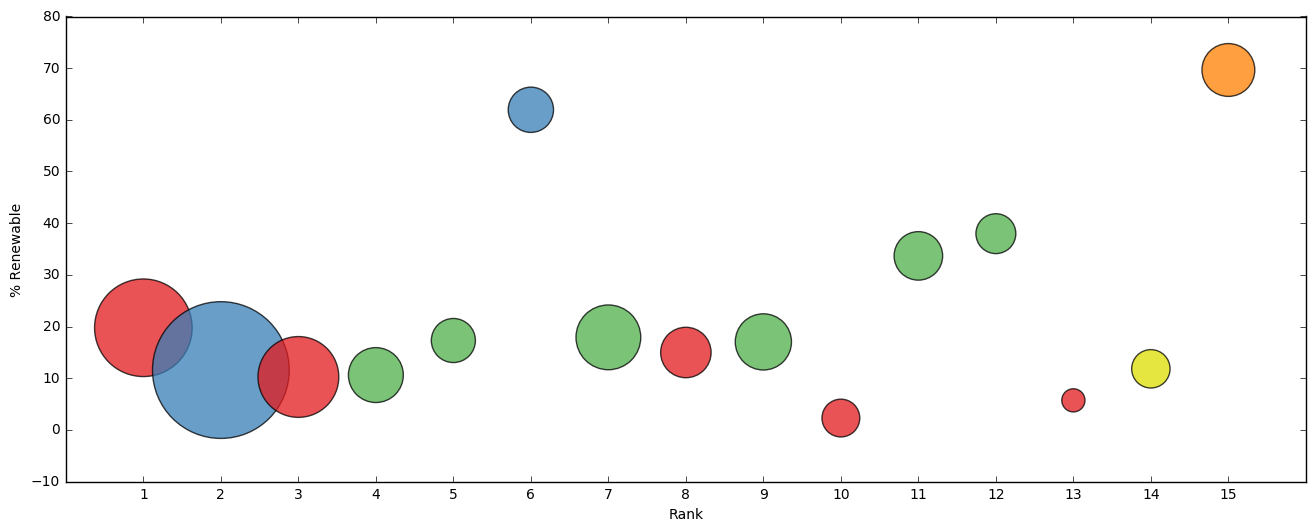

In [59]:
plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!